In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv', delimiter = ',',encoding = 'utf-8', header = 0)

In [3]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes = diabetes[diabetes['age'] > 3.0]

In [5]:
unique_values = diabetes['age'].unique()
print(unique_values)

[80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 15. 37. 40.  5. 69.
 72.  4. 30. 45. 43. 50. 41. 26. 34. 73. 77. 66. 29. 60. 38. 57. 74. 19.
 46. 21. 59. 27. 13. 56.  7. 11.  6. 55.  9. 62. 47. 12. 68. 75. 22. 58.
 18. 24. 17. 25. 33. 16. 61. 31.  8. 49. 39. 65. 14. 70. 48. 51. 71. 64.
 63. 52. 10. 35. 23.]


In [6]:
unique_values = diabetes['smoking_history'].unique()
print(unique_values)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [7]:
diabetes = diabetes[diabetes['smoking_history'] != 'No Info']

In [8]:
unique_values = diabetes['smoking_history'].unique()
print(unique_values)

['never' 'current' 'former' 'ever' 'not current']


In [9]:
ever_count = len(diabetes[diabetes['smoking_history'] == 'ever'])
print("ever_count:", ever_count)

ever_count: 4003


In [10]:
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})
diabetes = diabetes[diabetes['gender'] != 'Other']

In [11]:
unique_values = diabetes['gender'].unique()
print(unique_values)

[1 0]


In [12]:
# Create dummy variables for the 'Smoking' column
smoking_dummies = pd.get_dummies(diabetes['smoking_history'], prefix='smoking')

# Merge the dummy variables with the original DataFrame
diabetes = pd.concat([diabetes, smoking_dummies], axis=1)

# Drop the original 'Smoking' column, as it is no longer needed
diabetes = diabetes.drop('smoking_history', axis=1)

In [13]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
2,0,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,1,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,0,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
5,1,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0


In [14]:
X = diabetes[['gender','age','hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_current', 'smoking_ever', 'smoking_former']].values
y = diabetes['diabetes'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Make predictions
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [18]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [19]:
print("The model's accuracy for the train data is: \t", accuracy_train)
print("The model's accuracy for the test data is: \t", accuracy_test)

The model's accuracy for the train data is: 	 0.9485861182519281
The model's accuracy for the test data is: 	 0.9497645211930926


In [20]:
# Confusion Matrix

cf_matrix= confusion_matrix(y_train, y_train_pred)


<AxesSubplot:>

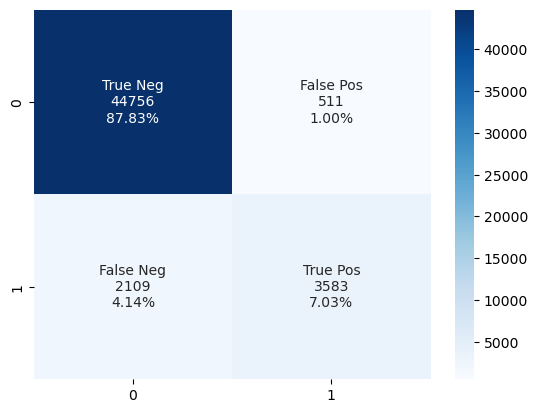

In [21]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [22]:
cf_matrix_test= confusion_matrix(y_test, y_test_pred)

<AxesSubplot:>

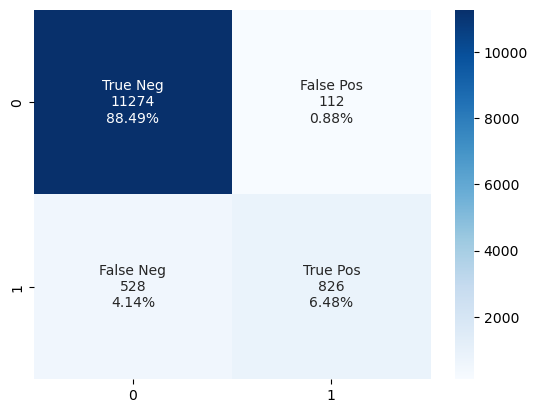

In [23]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt="", cmap='Blues')

<AxesSubplot:>

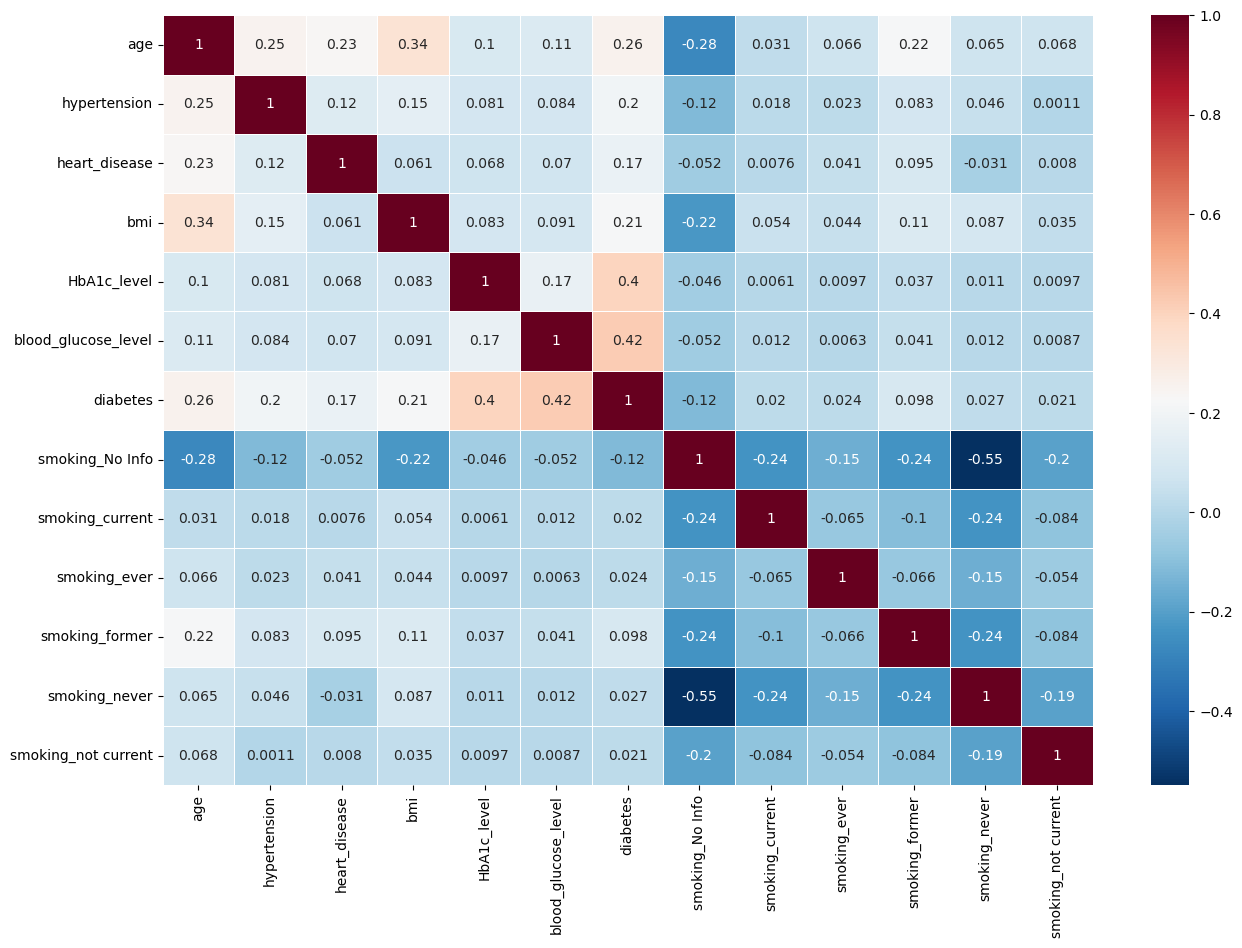

In [20]:
corr = diabetes.corr(method='pearson')
#Pearson - Visual heatmap
fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)